In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import ensemble
from sklearn.metrics import accuracy_score
%matplotlib inline
plt.style.use('fivethirtyeight')


c:\program files\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python37\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
c:\program files\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
train=pd.read_csv('train.csv.zip')
test=pd.read_csv('test.csv.zip')

In [4]:
train.shape

(59381, 128)

In [5]:
test.shape

(19765, 127)

In [6]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [7]:
test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [8]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [9]:
missing_percentage(train)


,Total,Percent
Medical_History_10,58824,99.06
Medical_History_32,58274,98.14
Medical_History_24,55580,93.60
Medical_History_15,44596,75.10
Family_Hist_5,41811,70.41
Family_Hist_3,34241,57.66
Family_Hist_2,28656,48.26
Insurance_History_5,25396,42.77
Family_Hist_4,19184,32.31
Employment_Info_6,10854,18.28


In [10]:
missing_percentage(test)


,Total,Percent
Medical_History_10,19564,98.98
Medical_History_32,19414,98.22
Medical_History_24,18585,94.03
Medical_History_15,14864,75.20
Family_Hist_5,13624,68.93
Family_Hist_3,11064,55.98
Family_Hist_2,9880,49.99
Insurance_History_5,8105,41.01
Family_Hist_4,6677,33.78
Employment_Info_6,3787,19.16


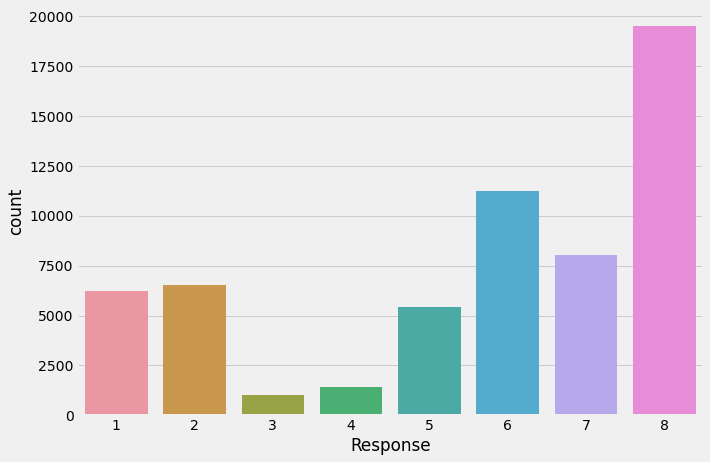

In [5]:
plt.figure(figsize=(10,7))

ax = sns.countplot(x="Response", data=train )
plt.show()


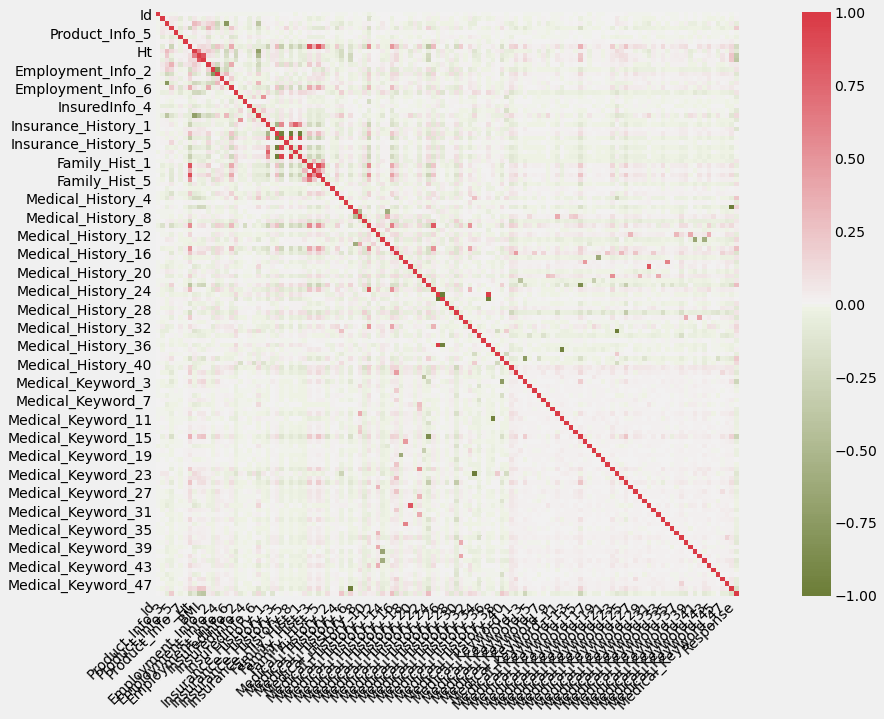

In [11]:
plt.figure(figsize=(20,10))

corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(100, 370, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### We are not getting clear Visual on correlation Graph.

c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

Text(0.5, 1.0, 'Response VS Height')

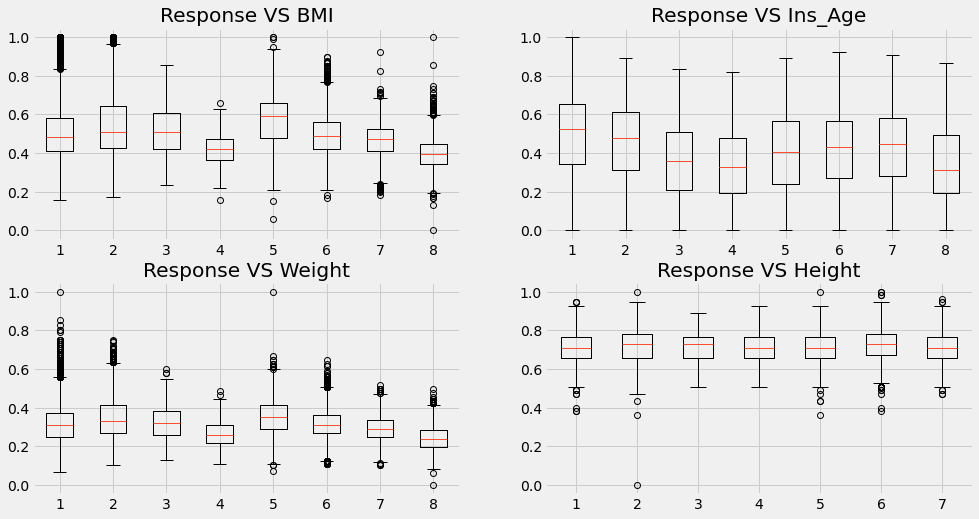

In [20]:
# Influence of BMI on risk level 
data = []
for i in range(1,9): 
    data.append(train.BMI[train.Response == i])
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
plt.boxplot(data)
plt.title('Response VS BMI')

data = []
for i in range(1,9): 
    data.append(train.Ins_Age[train.Response == i])
plt.subplot(2,2,2)
plt.boxplot(data)
plt.title('Response VS Ins_Age')

data = []
for i in range(1,9): 
    data.append(train.Wt[train.Response == i])
plt.subplot(2,2,3)
plt.boxplot(data)
plt.title('Response VS Weight')

data = []
for i in range(1,8): 
    data.append(train.Ht[train.Response == i])
plt.subplot(2,2,4)
plt.boxplot(data)
plt.title('Response VS Height')


<Figure size 1440x1440 with 0 Axes>

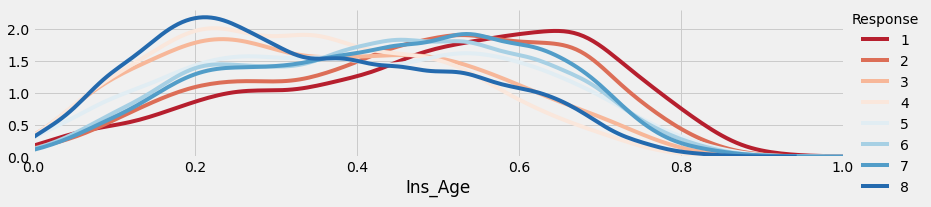

In [20]:
#age response relationship

plt.figure(figsize=(20,20))
facet = sns.FacetGrid(train, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'Ins_Age')
facet.set(xlim=(0, train['Ins_Age'].max()))
facet.add_legend()
plt.show()


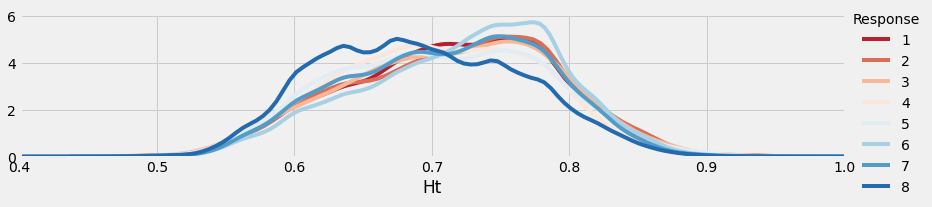

In [19]:
#Height Facet Grid


facet = sns.FacetGrid(train, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'Ht')
facet.set(xlim=(0.4, train['Ht'].max()))
facet.add_legend() 

[(0.0, 1.1)]

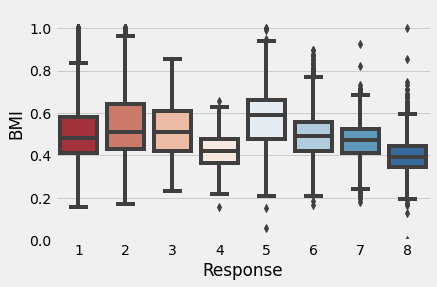

In [23]:
#BMI boxplot
ax = sns.boxplot(x="Response", y="BMI", data=train, 
                 order=[1,2,3,4,5,6,7,8], palette="RdBu")
ax.set(ylim=(0, 1.1))

Text(0, 0.5, 'Response')

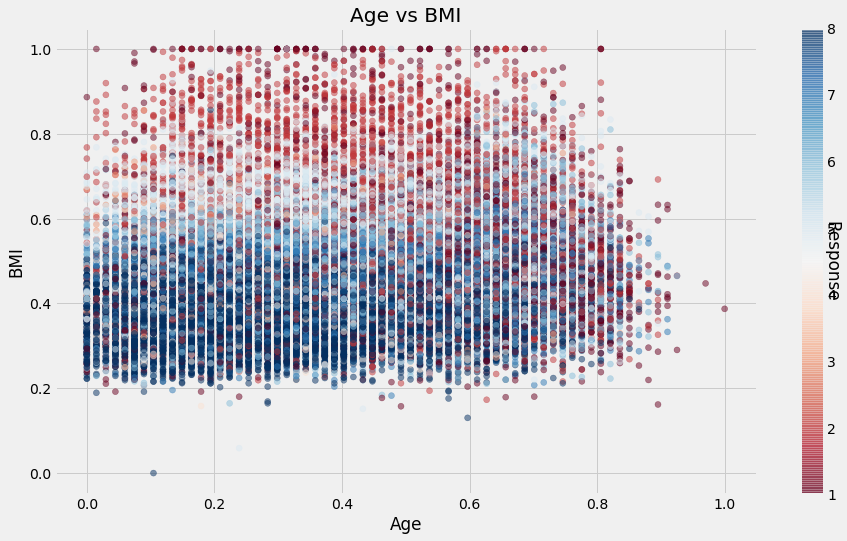

In [25]:
#Age VS BMI
fig, ax = plt.subplots(1,1,figsize=(14,8))
cm = plt.cm.get_cmap('RdBu')
ax = plt.scatter(train["Ins_Age"], train["BMI"], c=train["Response"], alpha=0.5, cmap=cm)
plt.xlim=(0, 1.0)
plt.ylim=(0, 1.0)

plt.title("Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")

cbar=plt.colorbar(ax)
cbar.ax.set_ylabel('Response', rotation=270)

In [36]:
import matplotlib.pyplot as plt
import chart_studio.plotly as py

